<h1>Group 1 Transactions Final Project


<h2>Import Dependencies


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
from datetime import datetime

<h2>Import and check data

In [2]:
excel_data = pd.read_excel("datasets/ISE_CoffeeTransaction_April2023.xlsx", sheet_name = None)

dataframes = {}

for sheet_name, sheet_data in excel_data.items():
    dataframes[sheet_name] = sheet_data
    
transactions = dataframes["Transactions"]
account = dataframes["Account"]
location = dataframes["location"]
products = dataframes["Product"]

In [3]:
transactions.head()

,transaction_id,Account_id,transaction_amount,transaction_date,time_to_purchase,gas_type,gas_price_purchase,product_id,Location
0,23,1004,2.50,2023-01-01,19:00:00,NaN,0.00,1,7
1,41666,1013,65.77,2023-01-01,11:00:00,A,65.77,7,7
2,6321,1014,37.80,2023-01-01,12:00:00,B,37.80,10,7
3,34042,1015,3.00,2023-01-01,15:00:00,NaN,0.00,2,7
4,1006,1016,3.00,2023-01-01,16:00:00,NaN,0.00,2,7


<h2>Exploratory Data Analysis (EDA)

<h3>Visualising Location of Interest

In [4]:
location

,Location,Location Detail,Latitude,Longtitude
0,1,CentralWorld,13.746680,100.539067
1,2,Siam Paragon,13.746464,100.534566
2,3,Mega Bangna,13.660615,100.609743
3,4,Silom Complex,13.725744,100.531582
4,5,The Crystal,13.787408,100.571691
5,6,CentralPlaza WestGate,13.816253,100.348801
6,7,Sukhumvit,13.730524,100.567579


In [5]:
transactions.groupby("Location").count()

,transaction_id,Account_id,transaction_amount,transaction_date,time_to_purchase,gas_type,gas_price_purchase,product_id
Location,,,,,,,,
7,44500,44500,44500,44500,44500,22155,44500,44500


<p><b>Note: </b>The transactional data given was for only one location, which was <strong>Sukhumvit</strong>

In [6]:
map_bangkok = folium.Map(location=[13.736717, 100.523186], zoom_start=12)

coordinates = []
location_dic = location.to_dict()
for i in range(7):
    coords = {}
    coords["name"] = location_dic["Location Detail"][i].strip()
    coords["lat"] = location_dic["Latitude"][i]
    coords["lon"] = location_dic["Longtitude"][i]

    coordinates.append(coords)

for coord in coordinates:
    name = coord['name']
    lat = coord['lat']
    lon = coord['lon']
    popup_text = f'<b>{name}</b>'
    if name == "Sukhumvit":
        folium.Marker([lat, lon], icon=folium.Icon(color='red'), popup=popup_text).add_to(map_bangkok)    
    else:
        folium.Marker([lat, lon], popup=popup_text).add_to(map_bangkok)

title = '''
        <h1 align="center" style="font-size:16px"><b>Locations</b></h3>
        '''
map_bangkok.get_root().html.add_child(folium.Element(title))
map_bangkok


<h3>Visualising Total Sales

In [7]:
transactions.head()

,transaction_id,Account_id,transaction_amount,transaction_date,time_to_purchase,gas_type,gas_price_purchase,product_id,Location
0,23,1004,2.50,2023-01-01,19:00:00,NaN,0.00,1,7
1,41666,1013,65.77,2023-01-01,11:00:00,A,65.77,7,7
2,6321,1014,37.80,2023-01-01,12:00:00,B,37.80,10,7
3,34042,1015,3.00,2023-01-01,15:00:00,NaN,0.00,2,7
4,1006,1016,3.00,2023-01-01,16:00:00,NaN,0.00,2,7


In [8]:
by_account_sum = transactions[["Account_id","transaction_amount"]].groupby("Account_id").sum()
by_account_count = transactions[["Account_id","transaction_amount"]].groupby("Account_id").count()
pivot_table = pd.pivot_table(by_account_sum.merge(by_account_count, left_on= "Account_id", right_on = "Account_id"), index = "Account_id")
pivot_table

,transaction_amount_x,transaction_amount_y
Account_id,,
1001,1207.20,46
1002,1161.59,44
1003,1229.70,44
1004,996.37,40
1005,1640.52,45
...,...,...
2996,205.45,8
2997,476.97,15
2998,296.04,11


In [9]:
total_transactions =  products.merge(transactions[["product_id","transaction_amount"]].groupby("product_id").sum(), left_on = "product_id", right_on = "product_id")
total_transactions

,product_id,product_name,product_description,product_category,product_price,transaction_amount
0,1,Coffee,Hot brewed coffee,Beverage,2.5,46173.00
1,2,Croissant,Flaky and buttery pastry,Pastry,3.0,48031.99
2,3,Tea,Tea with milk and sugar,Beverage,2.0,43355.05
3,4,Muffin,Freshly baked muffin,Pastry,3.5,45829.57
4,5,Bagel,Toasted bagel with cream cheese,Pastry,3.0,44832.61
5,6,Latte,Coffee with steamed milk,Beverage,3.5,44601.93
6,7,Cappuccino,Coffee with foamed milk,Beverage,3.5,47562.13
7,8,Espresso,Strong coffee shot,Beverage,2.5,42912.10
8,9,Hot Chocolate,Warm chocolate drink,Beverage,3.0,5508.00
9,10,RedBull,RedBull,Beverage,4.0,808630.78


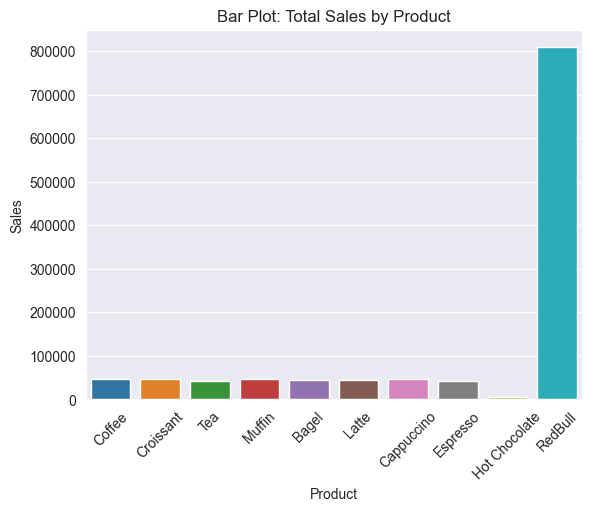

In [10]:
sns.set_style('darkgrid')

sns.barplot(x = "product_name", y = "transaction_amount", data = total_transactions)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Bar Plot: Total Sales by Product')
plt.xticks(rotation=45)

plt.show()

<h3>Visualising Patterns in Repeated Purchases

<h3>Visualising Target Age 

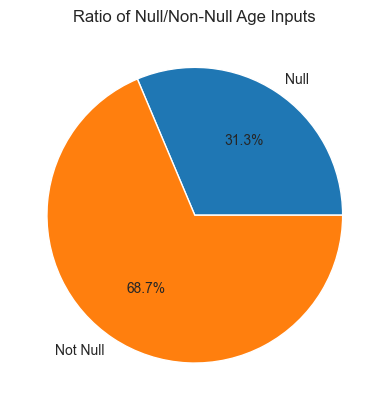

In [11]:
plt.pie([account["Age"].isnull().sum(),account["Age"].notnull().sum()], labels = ["Null", "Not Null"], autopct='%1.1f%%')
plt.title("Ratio of Null/Non-Null Age Inputs")
plt.show()

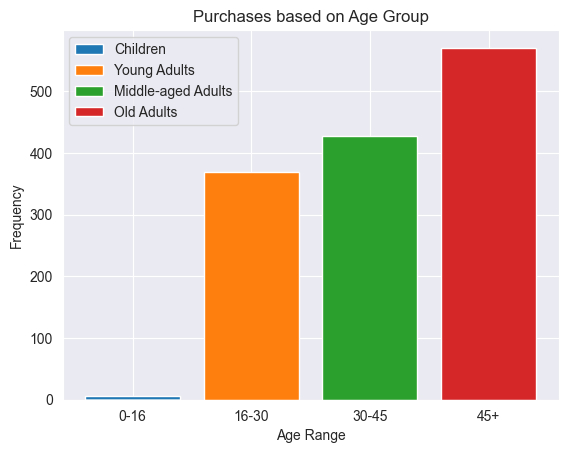

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

temp = account.copy()

age_ranges = [0, 16, 30, 45, 100]
age_labels = ['Children', 'Young Adults', 'Middle-aged Adults', 'Old Adults']
age_group = ["0-16", "16-30", "30-45", "45+"]

temp['AgeRange'] = pd.cut(temp['Age'], bins=age_ranges, labels=age_group, right=False)


age_range_counts = temp['AgeRange'].value_counts().sort_values(ascending = True)

colors = plt.cm.tab10(range(len(age_labels)))
plt.bar(age_range_counts.index, age_range_counts.values, color = colors)
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.title('Purchases based on Age Group')

legend_handles = [plt.bar(0, 0, color=colors[i])[0] for i in range(len(age_labels))]
plt.legend(legend_handles, age_labels, loc='upper left')

plt.show()


<h3>Visualising Transactions over Time

In [13]:
transactions_copy = transactions.copy()
transactions_copy = transactions_copy.merge(products[["product_id","product_name","product_category"]], left_on = "product_id", right_on = "product_id")
transactions_copy

,transaction_id,Account_id,transaction_amount,transaction_date,time_to_purchase,gas_type,gas_price_purchase,product_id,Location,product_name,product_category
0,23,1004,2.50,2023-01-01,19:00:00,NaN,0.00,1,7,Coffee,Beverage
1,33889,1017,60.36,2023-01-01,17:00:00,A,60.36,1,7,Coffee,Beverage
2,33312,1072,2.50,2023-01-01,14:00:00,NaN,0.00,1,7,Coffee,Beverage
3,33983,1075,74.47,2023-01-01,21:00:00,B,74.47,1,7,Coffee,Beverage
4,32733,1107,2.50,2023-01-01,16:00:00,NaN,0.00,1,7,Coffee,Beverage
...,...,...,...,...,...,...,...,...,...,...,...
44495,14169,1934,2.50,2023-04-30,09:00:00,NaN,0.00,8,7,Espresso,Beverage
44496,14089,1985,2.50,2023-04-30,08:00:00,NaN,0.00,8,7,Espresso,Beverage
44497,14407,1987,2.50,2023-04-30,15:00:00,NaN,0.00,8,7,Espresso,Beverage
44498,28813,2275,2.50,2023-04-30,19:00:00,NaN,0.00,8,7,Espresso,Beverage


In [14]:
transactions_copy["time_to_purchase"] = pd.to_datetime(transactions_copy["time_to_purchase"].astype(str), errors = 'coerce')
transactions_copy["hour"] = transactions_copy["time_to_purchase"].dt.hour
sales_by_hour = transactions_copy[["transaction_amount","hour"]].groupby("hour").sum()
beverage_sales = transactions_copy[["transaction_amount","hour"]][transactions_copy["product_category"] == "Beverage"].groupby("hour").sum()
pastry_sales = transactions_copy[["transaction_amount","hour"]][transactions_copy["product_category"] == "Pastry"].groupby("hour").sum()


C:\Users\Kridbhume Chammanard\AppData\Local\Temp\ipykernel_24112\1812423582.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transactions_copy["time_to_purchase"] = pd.to_datetime(transactions_copy["time_to_purchase"].astype(str), errors = 'coerce')


C:\Users\Kridbhume Chammanard\AppData\Local\Temp\ipykernel_24112\3764632573.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  items = transactions_copy[["transaction_amount","hour"]][transactions_copy["product_category"] == "Beverage"][transactions_copy["product_name"] == name].groupby("hour").sum()
C:\Users\Kridbhume Chammanard\AppData\Local\Temp\ipykernel_24112\3764632573.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  items = transactions_copy[["transaction_amount","hour"]][transactions_copy["product_category"] == "Beverage"][transactions_copy["product_name"] == name].groupby("hour").sum()
C:\Users\Kridbhume Chammanard\AppData\Local\Temp\ipykernel_24112\3764632573.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  items = transactions_copy[["transaction_amount","hour"]][transactions_copy["product_category"] == "Beverage"][transactions_copy["product_name"] == name].groupby("hour"

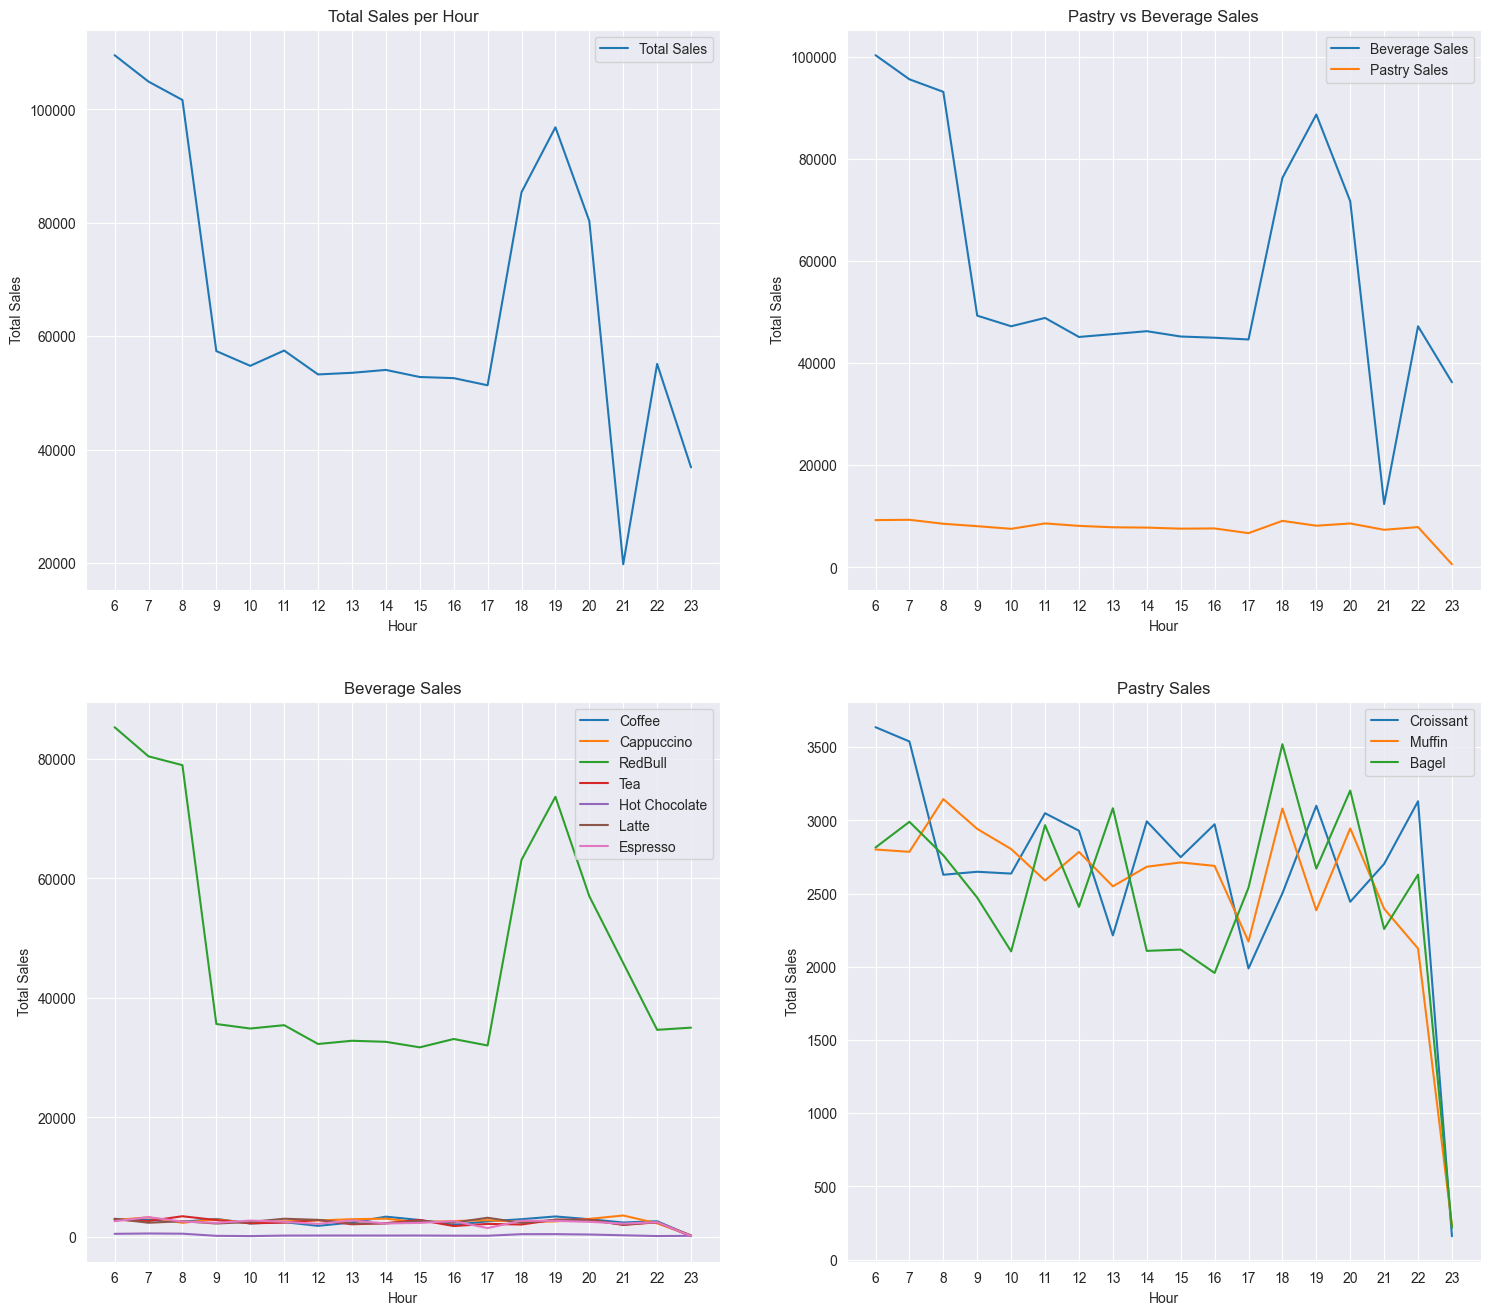

In [15]:
fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize = (18,16))

#plot total sales per hour
axes[0,0].plot(sales_by_hour.index, sales_by_hour.values, label = 'Total Sales')
axes[0,0].set_xlabel("Hour")
axes[0,0].set_ylabel("Total Sales")
axes[0,0].set_title("Total Sales per Hour")
axes[0,0].set_xticks(sales_by_hour.index.astype(int))
axes[0,0].legend()

#plot sales of beverage vs pastry
axes[0,1].plot(beverage_sales.index, beverage_sales.values, label = "Beverage Sales")
axes[0,1].plot(pastry_sales.index, pastry_sales.values, label = "Pastry Sales")
axes[0,1].set_xlabel("Hour")
axes[0,1].set_ylabel("Total Sales")
axes[0,1].set_title("Pastry vs Beverage Sales")
axes[0,1].set_xticks(sales_by_hour.index.astype(int))
axes[0,1].legend()

#plot total sales of beverages
for name in transactions_copy["product_name"][transactions_copy["product_category"] == "Beverage"].unique():
    items = transactions_copy[["transaction_amount","hour"]][transactions_copy["product_category"] == "Beverage"][transactions_copy["product_name"] == name].groupby("hour").sum()
    axes[1,0].plot(items.index, items.values, label = name)
    axes[1,0].legend(loc = 'upper right')
axes[1,0].set_xlabel("Hour")
axes[1,0].set_ylabel("Total Sales")
axes[1,0].set_title("Beverage Sales")
axes[1,0].set_xticks(sales_by_hour.index.astype(int))

#plot total sales of pastry
for name in transactions_copy["product_name"][transactions_copy["product_category"] == "Pastry"].unique():
    items = transactions_copy[["transaction_amount","hour"]][transactions_copy["product_category"] == "Pastry"][transactions_copy["product_name"] == name].groupby("hour").sum()
    axes[1,1].plot(items.index, items.values, label = name)
    axes[1,1].legend(loc = 'upper right')
axes[1,1].set_xlabel("Hour")
axes[1,1].set_ylabel("Total Sales")
axes[1,1].set_title("Pastry Sales")
axes[1,1].set_xticks(sales_by_hour.index.astype(int))


plt.show()

In [16]:
transactions_copy["day"] = transactions_copy["transaction_date"].dt.strftime('%A')
transactions_copy[["hour","day"]]

,hour,day
0,19,Sunday
1,17,Sunday
2,14,Sunday
3,21,Sunday
4,16,Sunday
...,...,...
44495,9,Sunday
44496,8,Sunday
44497,15,Sunday
44498,19,Sunday


In [17]:
df = transactions_copy

z_scores = np.abs((df['transaction_amount'] - df['transaction_amount'].mean()) / df['transaction_amount'].std())

threshold = 3

transactions_removed_outliers = df.drop(df[z_scores > threshold].index)

Text(0.5, 1.0, 'Transacion Amount Per Day (Removed Outliers)')

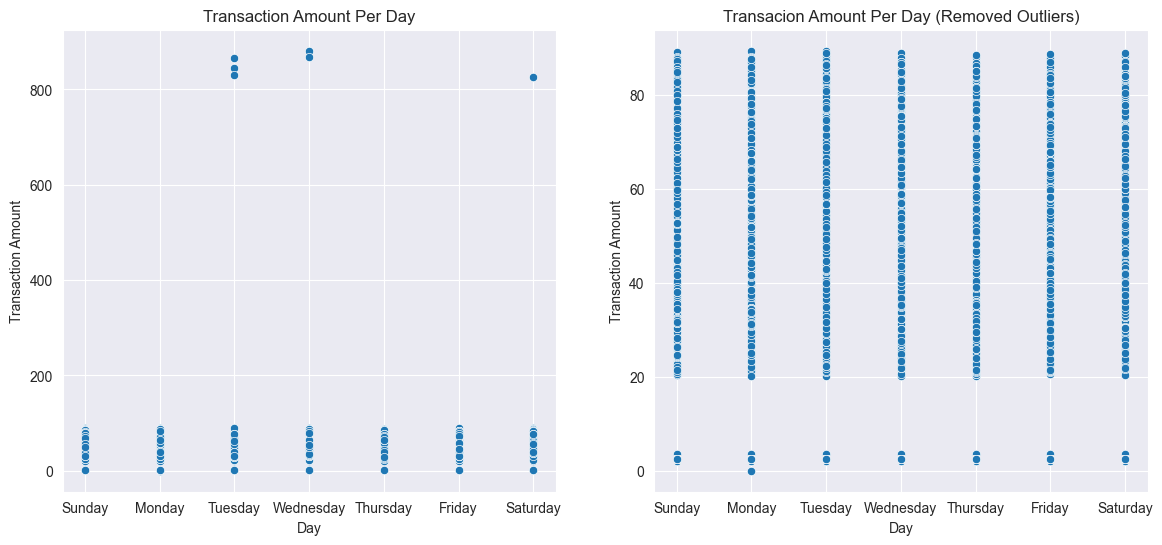

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (14,6))

sns.scatterplot(data = transactions_copy, x = "day", y = "transaction_amount", ax = ax1)
ax1.set_xlabel("Day")
ax1.set_ylabel("Transaction Amount")
ax1.set_title("Transaction Amount Per Day")

sns.scatterplot(data = transactions_removed_outliers, x = "day", y = "transaction_amount", ax = ax2)
ax2.set_xlabel("Day")
ax2.set_ylabel("Transaction Amount")
ax2.set_title("Transacion Amount Per Day (Removed Outliers)")

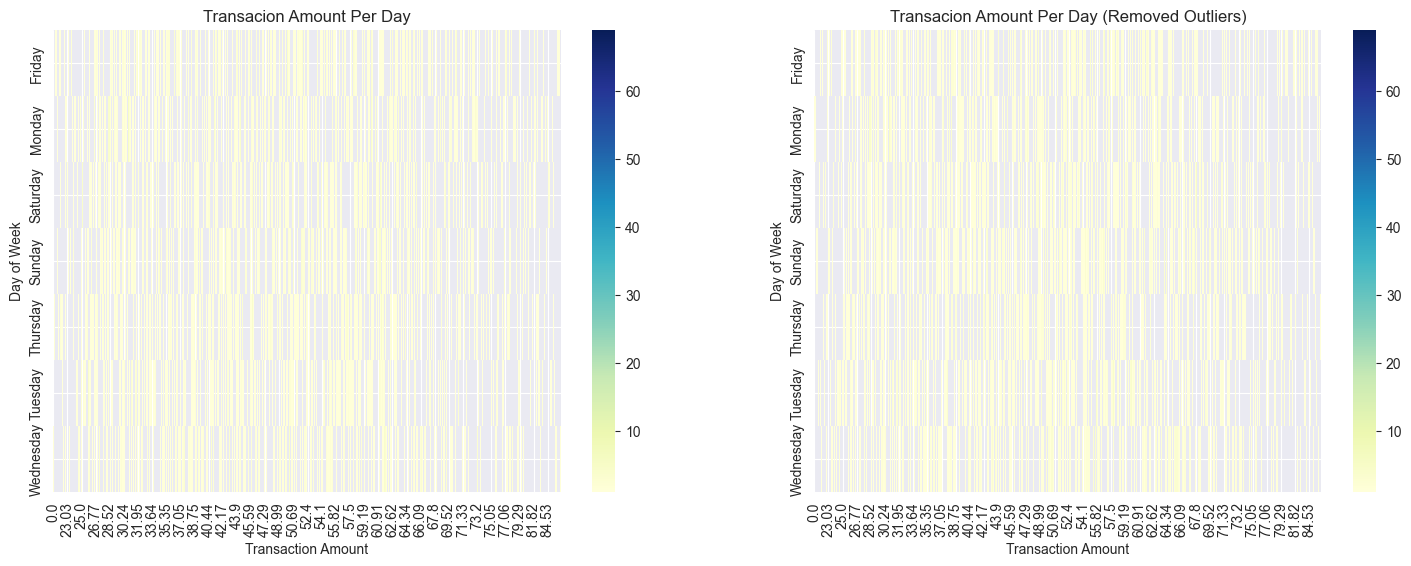

In [19]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (18,6))

heatmap_data = transactions_copy.dropna().pivot_table(index='day', columns = "transaction_amount", aggfunc = 'size')
sns.heatmap(data=heatmap_data, cmap='YlGnBu',ax = ax1)
ax1.set_xlabel("Transaction Amount")
ax1.set_ylabel("Day of Week")
ax1.set_title("Transacion Amount Per Day")

heatmap_data = transactions_removed_outliers.dropna().pivot_table(index='day', columns = "transaction_amount", aggfunc = 'size')
sns.heatmap(data=heatmap_data, cmap='YlGnBu',ax = ax2)
ax2.set_xlabel("Transaction Amount")
ax2.set_ylabel("Day of Week")
ax2.set_title("Transacion Amount Per Day (Removed Outliers)")

plt.show()

<h3>Visualising Gas Prices vs Product Transactions

TypeError: float() argument must be a string or a real number, not 'Timestamp'

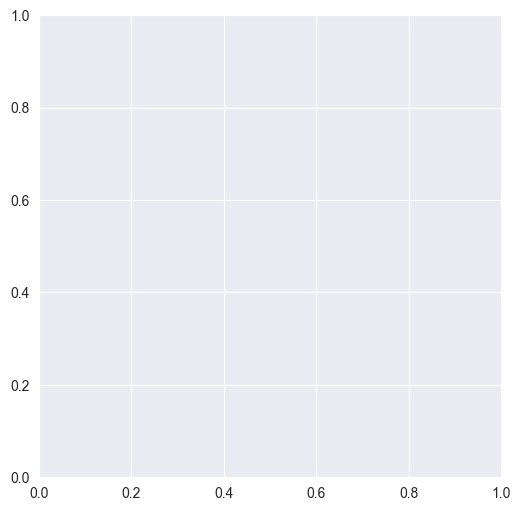

In [27]:
product_no_gas = transactions[(transactions["gas_price_purchase"] == 0.00) & (transactions["transaction_amount"] > 0)].count()[0]
gas_no_product = transactions[(transactions["gas_price_purchase"] > 0.00) & (transactions["transaction_amount"] == transactions["gas_price_purchase"])].count()[0]
bought_gas_and_product = transactions[(transactions["gas_price_purchase"] > 0.00) & (transactions["transaction_amount"] > transactions["gas_price_purchase"])]
nothing =  transactions[transactions["transaction_amount"] == 0.00].shape[0]

labels = ["Bought only products", "Bought only gas", "Bought gas and Product"]
sizes = [product_no_gas, gas_no_product,bought_gas_and_product]

plt.figure(figsize=(6,6))

plt.pie(sizes, labels = labels, autopct='%1.1f%%')

plt.show()

In [28]:
bought_gas_and_product

,transaction_id,Account_id,transaction_amount,transaction_date,time_to_purchase,gas_type,gas_price_purchase,product_id,Location,product_price_purchase
17099,31806,2967,881.09,2023-02-15,22:00:00,A,81.09,10,7,800.0
19291,31621,2967,844.64,2023-02-21,23:00:00,B,44.64,10,7,800.0
19648,32354,2967,868.47,2023-02-22,22:00:00,B,68.47,10,7,800.0
25873,31707,2977,825.75,2023-03-11,23:00:00,A,25.75,10,7,800.0
28486,32215,2977,826.19,2023-03-18,22:00:00,X,26.19,10,7,800.0
34869,31507,2977,829.98,2023-04-04,22:00:00,A,29.98,10,7,800.0
37420,32491,2967,866.35,2023-04-11,23:00:00,A,66.35,10,7,800.0


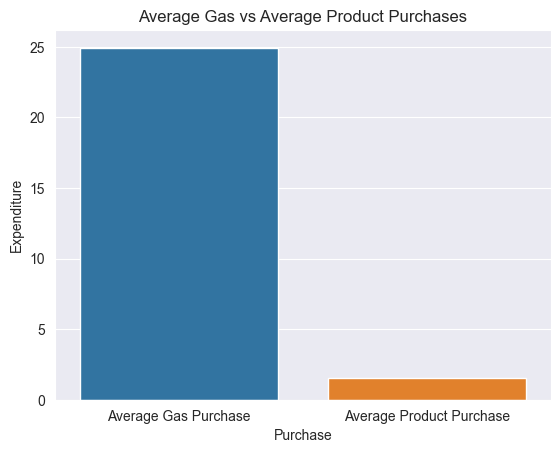

In [21]:
transactions["product_price_purchase"] = transactions["transaction_amount"] - transactions["gas_price_purchase"]

sns.barplot(x = ["Average Gas Purchase", "Average Product Purchase"], y = [transactions["gas_price_purchase"].mean(), transactions["product_price_purchase"].mean()])
plt.ylabel("Expenditure")
plt.xlabel("Purchase")
plt.title("Average Gas vs Average Product Purchases")
plt.show()

<h3>Visualising Gas Types

In [22]:
df = transactions[["transaction_amount","gas_type"]].groupby("gas_type").sum()
df.reset_index(inplace=True)
df

,gas_type,transaction_amount
0,A,370859.40
1,B,372827.19
2,X,368009.57


Text(0.5, 1.0, 'Purchases based on Gas Type')

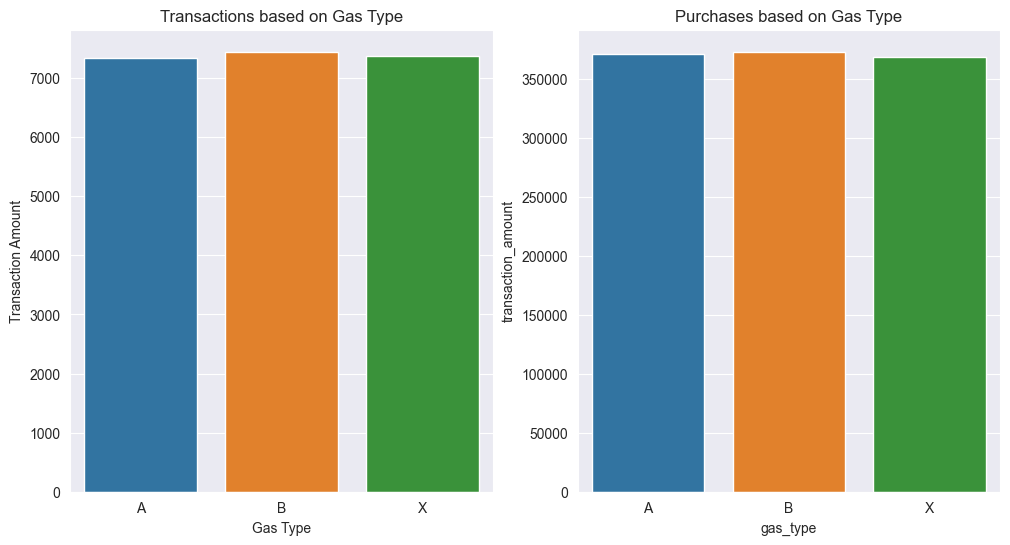

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,6))

sns.countplot(x = transactions["gas_type"], ax = ax1)
ax1.set_xlabel("Gas Type")
ax1.set_ylabel("Count")
ax1.set_title("Purchases based on Gas Type")

df = transactions[["transaction_amount","gas_type"]].groupby("gas_type").sum()
df.reset_index(inplace=True)
sns.barplot(data = df, x = "gas_type", y = "transaction_amount",ax = ax2)
ax1.set_xlabel("Gas Type")
ax1.set_ylabel("Transaction Amount")
ax1.set_title("Transactions based on Gas Type")

plt.title("Purchases based on Gas Type")

<Axes: xlabel='transaction_amount', ylabel='gas_price_purchase'>

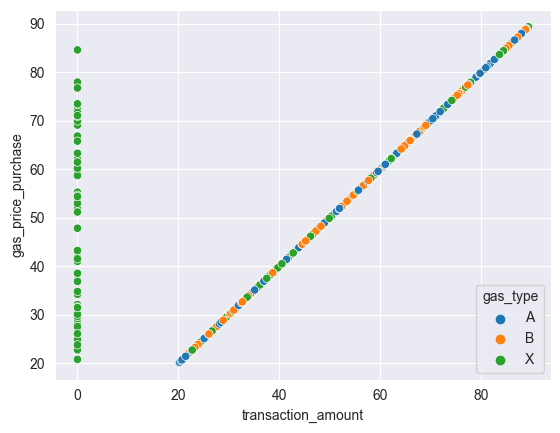

In [24]:
df = transactions

z_scores = np.abs((df['transaction_amount'] - df['transaction_amount'].mean()) / df['transaction_amount'].std())

threshold = 3

df_clean = df.drop(df[z_scores > threshold].index)

sns.scatterplot(data = df_clean, x = "transaction_amount", y = "gas_price_purchase", hue = "gas_type")

<h2>Data Preparation

<p>Remove Null</p>
<p>Remove Outliers</p>
